In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [89]:
star_wars.columns
star_wars["Unnamed: 5"]

0       Star Wars: Episode III  Revenge of the Sith
1       Star Wars: Episode III  Revenge of the Sith
2                                               NaN
3       Star Wars: Episode III  Revenge of the Sith
4       Star Wars: Episode III  Revenge of the Sith
5       Star Wars: Episode III  Revenge of the Sith
6       Star Wars: Episode III  Revenge of the Sith
7       Star Wars: Episode III  Revenge of the Sith
8       Star Wars: Episode III  Revenge of the Sith
9       Star Wars: Episode III  Revenge of the Sith
10                                              NaN
11                                              NaN
12                                              NaN
13      Star Wars: Episode III  Revenge of the Sith
14      Star Wars: Episode III  Revenge of the Sith
15      Star Wars: Episode III  Revenge of the Sith
16      Star Wars: Episode III  Revenge of the Sith
17                                              NaN
18      Star Wars: Episode III  Revenge of the Sith
19      Star

In [90]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

In [91]:
dic = {"Yes":True,"No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(dic)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(dic)

In [92]:
dic1 = {"Star Wars: Episode I  The Phantom Menace":True,np.NaN:False}
dic2 = {"Star Wars: Episode II  Attack of the Clones":True,np.NaN:False}
dic3 = {"Star Wars: Episode III  Revenge of the Sith":True,np.NaN:False}
dic4 = {"Star Wars: Episode IV  A New Hope":True,np.NaN:False}
dic5 = {"Star Wars: Episode V The Empire Strikes Back":True,np.NaN:False}
dic6 = {"Star Wars: Episode VI Return of the Jedi":True,np.NaN:False}

In [93]:
star_wars["Which of the following Star Wars films have you seen? Please select all that apply."] = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(dic1)
star_wars["Unnamed: 4"] = star_wars["Unnamed: 4"].map(dic2)
star_wars["Unnamed: 5"] = star_wars["Unnamed: 5"].map(dic3)
star_wars["Unnamed: 6"] = star_wars["Unnamed: 6"].map(dic4)
star_wars["Unnamed: 7"] = star_wars["Unnamed: 7"].map(dic5)
star_wars["Unnamed: 8"] = star_wars["Unnamed: 8"].map(dic6)
star_wars["Unnamed: 5"]

1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11      False
12      False
13       True
14       True
15       True
16       True
17      False
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
30       True
        ...  
1157     True
1158    False
1159    False
1160    False
1161     True
1162     True
1163    False
1164    False
1165     True
1166     True
1167     True
1168    False
1169    False
1170    False
1171    False
1172     True
1173    False
1174     True
1175     True
1176     True
1177    False
1178     True
1179    False
1180    False
1181     True
1182     True
1183     True
1184    False
1185     True
1186    False
Name: Unnamed: 5, dtype: bool

In [94]:
dict_rename = {}

for i,column in enumerate(star_wars.columns[3:9]):
    dict_rename[column] = "seen_{0}".format(i+1)
    
print(dict_rename)

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 6': 'seen_4', 'Unnamed: 5': 'seen_3', 'Unnamed: 8': 'seen_6', 'Unnamed: 7': 'seen_5', 'Unnamed: 4': 'seen_2'}


In [95]:
star_wars = star_wars.rename(columns = dict_rename)
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [96]:
star_wars[star_wars.columns[9:15]].astype(float)

dict_rename2 = {}

for i,column in enumerate(star_wars.columns[9:15]):
    dict_rename2[column] = "ranking_{0}".format(i+1)
    
star_wars = star_wars.rename(columns=dict_rename2)
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3
10,1,2,3,4,5,6


ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64
ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64


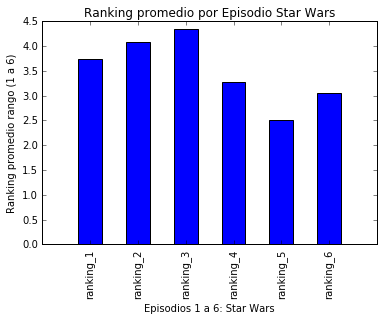

In [97]:
dictionary = {np.NaN:0}
rankings = star_wars[star_wars.columns[9:15]]
rank = rankings.loc[:,["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]].astype(float)
rank1 = rank.dropna()
ranking_final = rank1.mean()

print(ranking_final)
print(ranking_final)

%matplotlib inline

cols = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
fig, ax = plt.subplots()
bar_heights = ranking_final
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75]
tick_positions = range(1,7)

ax.bar(bar_positions,bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(cols,rotation=90)
ax.set_ylabel('Ranking promedio rango (1 a 6)')
ax.set_xlabel('Episodios 1 a 6: Star Wars')
ax.set_title("Ranking promedio por Episodio Star Wars")
plt.show()

###### Summary:

<i>
Hasta ahora lo que se hizo fue: 
- Leer el archivo csv con encoding "ISO-8859-1".

- Eliminar valores nulos de la columna Respondent ID (los que no respondian llevaban valores nulos).

- reemplazar varias columnas de respuesta "Yes"-"No" a valores booleanos True-False y de esta manera facilitar la selección en la columna "...vieron alguna de las pelis..." y en la "...te consideras fan de la saga?"

- reemplazar las columnas donde preguntaban si fueron viendo cada una de las peliculas de la saga cuya respuesta era el nombre de la película misma, directamente por True o si la respuesta era nula o np.NaN por False. 

- Se conviertieron los nombres de las columnas a nombres más cortos (ver arriba) con el método pandas.map(dic).

- Se calcularon las medias de los puntajes otorgados a cada película. 


Del gráfico podemos observar que no hay una muy marcada preferencia por alguna película de la saga, aunque los episodios 5 y 6 parecen tener valores más cercanos al 1. 


In [98]:
seen_movies_count = star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum()

star_wars[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [99]:
print(seen_movies_count)
print(ranking_final)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64
ranking_1    3.736211
ranking_2    4.091127
ranking_3    4.344125
ranking_4    3.269784
ranking_5    2.511990
ranking_6    3.046763
dtype: float64


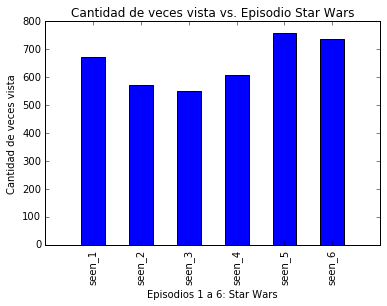

In [129]:
cols2 = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
fig, ax1 = plt.subplots()
bar_heights = seen_movies_count
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75]
tick_positions = range(1,7)

ax1.bar(bar_positions,bar_heights,0.5)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(cols2,rotation=90)
ax1.set_ylabel('Cantidad de veces vista')
ax1.set_xlabel('Episodios 1 a 6: Star Wars')
ax1.set_title("Cantidad de veces vista vs. Episodio Star Wars")
plt.show()

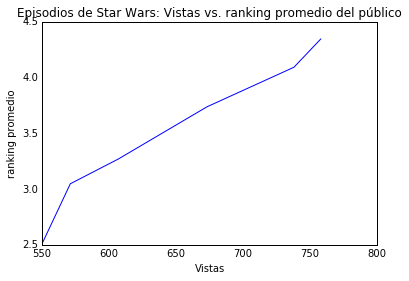

In [101]:
plt.plot(seen_movies_count.sort_values(),ranking_final.sort_values())

for key,spine in ax.spines.items():
        spine.set_visible(False)
    
plt.title("Episodios de Star Wars: Vistas vs. ranking promedio del público")
plt.tick_params(bottom="off", top="off", left="off", right="off",labelbottom="on")
#plt.xticklabels(cols2,rotation=90)
plt.ylabel('ranking promedio')
plt.xlabel('Vistas')

plt.show()

#### Gráficos, análisis: 

<i> Podemos ver que hay una correlación totalmente positiva en
el ranking promedio recibido por el público y la cantidad de veces que se vió la película. 

In [102]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]
males

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


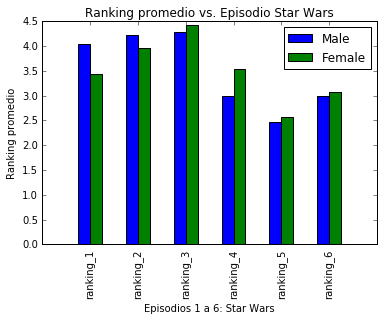

In [103]:
cols2 = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
fig, ax3 = plt.subplots()
bar_heights1 = males[males.columns[9:15]].astype(float).mean()
bar_heights2 = females[females.columns[9:15]].astype(float).mean()
bar_positions1 = [0.75,1.75,2.75,3.75,4.75,5.75]
bar_positions2 = [1,2,3,4,5,6]

tick_positions = range(1,7)

p1 = ax3.bar(bar_positions1,bar_heights1,0.25,label="Male",color='b')
p2 = ax3.bar(bar_positions2,bar_heights2,0.25,label="Female",color='g')
ax3.set_xticks(tick_positions)
ax3.set_xticklabels(cols2,rotation=90)
ax3.set_ylabel('Ranking promedio')
ax3.set_xlabel('Episodios 1 a 6: Star Wars')
ax3.set_title("Ranking promedio vs. Episodio Star Wars")
ax3.legend()
plt.show()

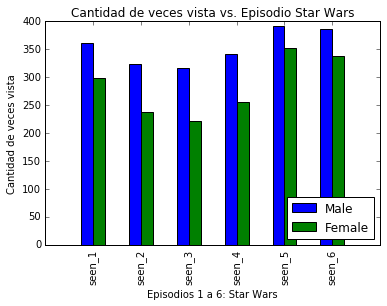

In [104]:
cols2 = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
fig, ax4 = plt.subplots()
bar_heights3 = males[males.columns[3:9]].astype(float).sum()
bar_heights4 = females[females.columns[3:9]].astype(float).sum()
bar_positions3 = [0.75,1.75,2.75,3.75,4.75,5.75]
bar_positions4 = [1,2,3,4,5,6]

tick_positions = range(1,7)

p1 = ax4.bar(bar_positions3,bar_heights3,0.25,label="Male",color='b')
p2 = ax4.bar(bar_positions4,bar_heights4,0.25,label="Female",color='g')
ax4.set_xticks(tick_positions)
ax4.set_xticklabels(cols2,rotation=90)
ax4.set_ylabel('Cantidad de veces vista')
ax4.set_xlabel('Episodios 1 a 6: Star Wars')
ax4.set_title("Cantidad de veces vista vs. Episodio Star Wars")
ax4.legend(loc='lower right')
plt.show()

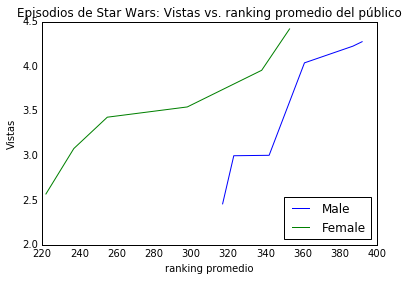

In [105]:
male_counts = males[males.columns[3:9]].astype(float).sum()
male_ranking = males[males.columns[9:15]].astype(float).mean()
female_counts = females[females.columns[3:9]].astype(float).sum()
female_ranking = females[females.columns[9:15]].astype(float).mean()

p1 = plt.plot(male_counts.sort_values(),male_ranking.sort_values(),label='Male')
p2 = plt.plot(female_counts.sort_values(),female_ranking.sort_values(),label='Female')

for key,spine in ax.spines.items():
        spine.set_visible(False)
    
plt.title("Episodios de Star Wars: Vistas vs. ranking promedio del público")
plt.tick_params(bottom="off", top="off", left="off", right="off",labelbottom="on")
plt.ylabel('Vistas')
plt.xlabel('ranking promedio')
plt.legend(loc='lower right')
plt.show()

##### La tendencia detectada anteriormente se repite para hombres y mujeres en forma separada, sin embargo, cambia el rango de cantidad de visualizaciones de cada película, no así el rango de puntaje que se mantiene similar en ambos géneros.
##### El rango de cantidad de visualizaciones es más acotado en los hombres comenzando desde un número mayor. Se podría deducir que el fanatismo de los hombres por la saga es superior.

In [106]:
star_wars["total_views"] = ed_count[["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]].sum(axis=1)
ed_count = star_wars[["Education","total_views"]]

In [108]:
print(ed_count.shape)
print(ed_count["Education"].unique())
ed_count_clean = ed_count[ed_count["Education"].notnull()]
print(ed_count_clean.shape)
ed_count_clean

(1186, 2)
['High school degree' 'Bachelor degree' 'Some college or Associate degree'
 nan 'Graduate degree' 'Less than high school degree']
(1036, 2)


,Education,total_views
1,High school degree,6
2,Bachelor degree,0
3,High school degree,3
4,Some college or Associate degree,6
5,Some college or Associate degree,6
6,Bachelor degree,6
7,High school degree,6
8,High school degree,6
9,Some college or Associate degree,6
10,Some college or Associate degree,1


                                  total_views
Education                                    
Bachelor degree                          1211
Graduate degree                          1038
High school degree                        327
Less than high school degree               18
Some college or Associate degree         1210


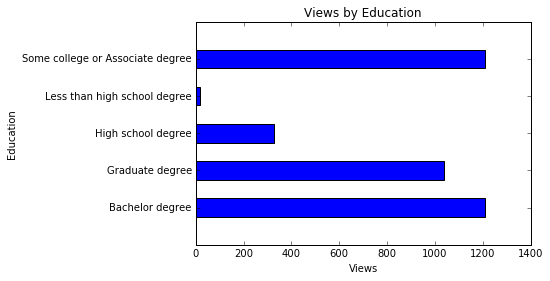

In [134]:
ed_list = ed_count_clean.groupby(by="Education")
a = ed_list.agg(np.sum)
print(a)
cols_ed = ['Bachelor degree','Graduate degree','High school degree','Less than high school degree','Some college or Associate degree']
fig, ax = plt.subplots()
bar_with = a.values
bar_positions = [0.75,1.75,2.75,3.75,4.75]
tick_positions = range(1,6)

ax.barh(bar_positions,bar_with,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols_ed)
ax.set_ylabel('Education')
ax.set_xlabel('Views')
ax.set_title("Views by Education")
plt.show()

##### Podemos observar que los episodios de Star Wars son más vistos a medida que hay un mayor nivel académico, esto puede deberse a una cuestión de edad. Las personas con "menos de high school degree" vieron muy poco la saga. 

                          total_views
Location (Census Region)             
East North Central                624
East South Central                153
Middle Atlantic                   462
Mountain                          324
New England                       294
Pacific                           663
South Atlantic                    603
West North Central                340
West South Central                358


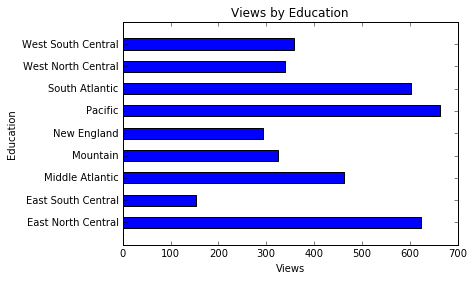

In [147]:
Location_count = star_wars[["Location (Census Region)","total_views"]]
location_list = Location_count.groupby(by="Location (Census Region)")
b = location_list.agg(np.sum)
print(b)

cols_ed = b.index
fig, ax = plt.subplots()
bar_with = b.values
bar_positions = [0.75,1.75,2.75,3.75,4.75,5.75,6.75,7.75,8.75]
tick_positions = range(1,10)

ax.barh(bar_positions,bar_with,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols_ed)
ax.set_ylabel('Education')
ax.set_xlabel('Views')
ax.set_title("Views by Education")
plt.show()


##### Vemos que los estados Mountain, East South Central y New England, son los menos aficionados a la saga.

In [156]:
z = star_wars["Which character shot first?"].value_counts().sum()
print(star_wars["Which character shot first?"].value_counts()/z*100)

Han                                 39.251208
I don't understand this question    36.956522
Greedo                              23.792271
Name: Which character shot first?, dtype: float64


##### Podemos ver que del total de personas que respondieron la pregunta, 40% responde que fue Han Solo quién disparó primero en la saga, 24% que fue Greedo y el 37% restante no entiende la pregunta. 

<i> Para poder inferir cuál es la respuesta correcta sin buscar en Google, podríamos filtrar a los "entrevistados autorizados" como aquellos que vieron toda la saga, seguramente será una forma de vislumbrar la respuesta correcta. 

In [161]:
w = star_wars.loc[star_wars["total_views"] == 6]["Which character shot first?"].value_counts().sum()
print(star_wars["Which character shot first?"].value_counts()/w*100)

Han                                 70.043103
I don't understand this question    65.948276
Greedo                              42.456897
Name: Which character shot first?, dtype: float64


###### Tenemos finalmente una tendencia del 70% hacia la respuesta "Han Solo". Bajo las hipótesis supuestas podríamos inferir que es la respuesta correcta, aunque nada podemos confirmar, podría existir un sesgo debido a que el actor que interpreta a "Han" es Harrison Ford, es decir, alguien muy famoso. Por otro lado, suponiendo que la inferencia es correcta (que lo es, pues si buscamos en Google nos damos cuenta), no tenemos una porcentaje más cercano al 100% ya que la saga al ser muy famosa, la mayoría de las personas la vió, es decir, el "Haber visto las 6" no es un signo definitorio de que se es un fanático, aunque acota bastante el resultado y mejora la estimación. 

In [220]:
caracters_rankings = {}
star_wars
print(star_wars["Unnamed: 19"].value_counts())
for i in range(16,29):
    a = star_wars.iloc[:,i].value_counts()["Very favorably"]
    b = star_wars.iloc[:,i].value_counts()["Somewhat favorably"]
    c = star_wars.iloc[:,i].value_counts()["Somewhat unfavorably"]
    d = star_wars.iloc[:,i].value_counts()["Very unfavorably"]
    caracters_rankings[i] = a+b-c-d
    
list(caracters_rankings.values())



Very favorably                                 591
Somewhat favorably                             159
Neither favorably nor unfavorably (neutral)     43
Unfamiliar (N/A)                                17
Somewhat unfavorably                             8
Very unfavorably                                 7
Name: Unnamed: 19, dtype: int64


[755, 739, 392, 735, 61, 230, 294, 150, 673, 731, -64, 259, 733]

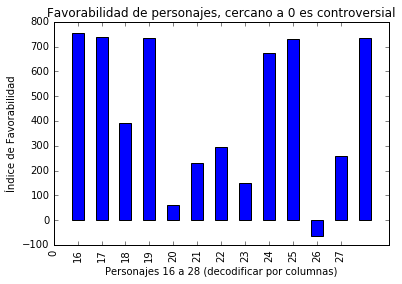

In [223]:
colsq = [0]+list(caracters_rankings.keys())
fig, ax21 = plt.subplots()
bar_heights = list(caracters_rankings.values())
bar_positions = []
for i in range(13):
    bar_positions.append(0.75+i)
tick_positions = range(13)

ax21.bar(bar_positions,bar_heights,0.5)
ax21.set_xticks(tick_positions)
ax21.set_xticklabels(colsq,rotation=90)
ax21.set_ylabel('Índice de Favorabilidad')
ax21.set_xlabel('Personajes 16 a 28 (decodificar por columnas)')
ax21.set_title("Favorabilidad de personajes, cercano a 0 es controversial")
plt.show()

##### Según el gráfico, El personaje más favorable es el de la columna 16 (valor más positivo), el menos favorable el de la columna 26 (valor más negativo) y el más controversial el de la columna 20 (valor más cercano a 0).